In [71]:
#importing all the materials needed for fast.ai
import fastbook
fastbook.setup_book()

In [72]:
from fastbook import *
from fastai.vision.widgets import*

In [73]:
# next up we need to get images from somewhere, we can use the bing image search through the following lines
key = os.environ.get('AZURE_SEARCH_KEY','f77c77a2c495446a86bb14948862dbe8')

In [74]:
#here we list what tick types we want to look at, along with thier root file
tick_types = 'deer','dog','lone star'
path = Path('ticks_species')

In [75]:
#this is our file management step
if not path.exists(): #this creates the root file if it doesn't exist
    path.mkdir()
    for s in tick_types: #next we cycle through all the stages in the tick stages vector
        dest = (path/s) #creating a path for said vector
        dest.mkdir(exist_ok = True) #setting it so that it exists
        results = search_images_bing(key,f'adult {s} tick ') #obtaining all urls
        download_images(dest, urls = results.attrgot('contentUrl')) #downloading all images

In [76]:
fns = get_image_files(path)
fns


(#229) [Path('ticks_species/dog/Screenshot_2021-03-18 eTick Public Tick Photo.png'),Path('ticks_species/dog/00000061.JPG'),Path('ticks_species/dog/DV.png'),Path('ticks_species/dog/ayyy.png'),Path('ticks_species/dog/Screenshot_2021-03-19 Dermacentor Variabilis Images, Stock Photos Vectors Shutterstock(13).png'),Path('ticks_species/dog/Screenshot_2021-03-19 Dermacentor Variabilis Images, Stock Photos Vectors Shutterstock(2).png'),Path('ticks_species/dog/00000029.png'),Path('ticks_species/dog/Screenshot_2021-03-19 Dermacentor Variabilis Images, Stock Photos Vectors Shutterstock(8).png'),Path('ticks_species/dog/Screenshot_2021-03-19 Dermacentor Variabilis Images, Stock Photos Vectors Shutterstock(12).png'),Path('ticks_species/dog/00000090.jpg')...]

In [77]:
dog = path.ls()[0]
lonestar = path.ls()[1]
bl = path.ls()[2]
print(len(get_image_files(dog)))
print(len(get_image_files(lonestar)))
print(len(get_image_files(bl)))

71
73
85


In [78]:
failed = verify_images(fns)
failed
# 2 nymphs 1 larva failed

(#0) []

In [79]:
failed.map(Path.unlink);

In [80]:
ticks = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.3, seed = 68),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(128, min_scale = 0.4)
)

In [81]:
dls = ticks.dataloaders(path)

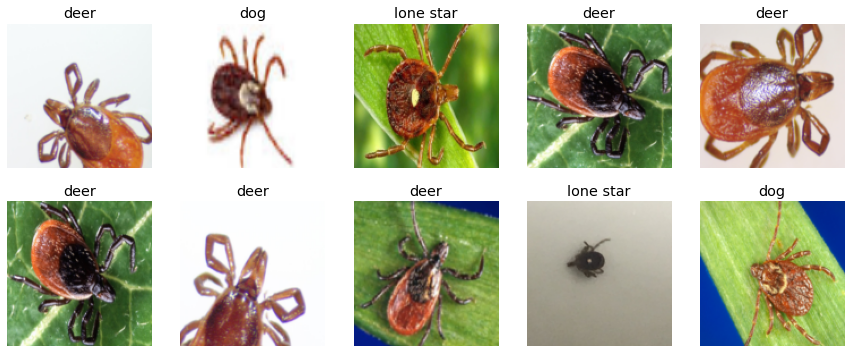

In [82]:
dls.valid.show_batch(max_n = 10, nrows = 2)

In [83]:
#ticks = ticks.new(RandomResizedCrop(128, min_scale = 0.3))
#dls = ticks.dataloaders(path)
#dls.train.show_batch(max_n = 10, nrows = 2)

In [84]:
learn = cnn_learner(dls,resnet34, metrics = error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.063037,3.216502,0.691176,00:03


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.498699,1.913942,0.573529,00:03
1,1.373997,0.976192,0.367647,00:03
2,1.115163,0.767703,0.220588,00:03
3,0.955261,0.703493,0.205882,00:03


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


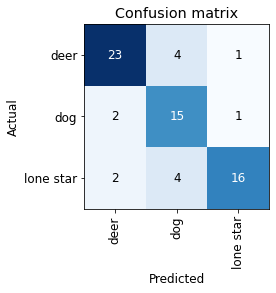

In [85]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

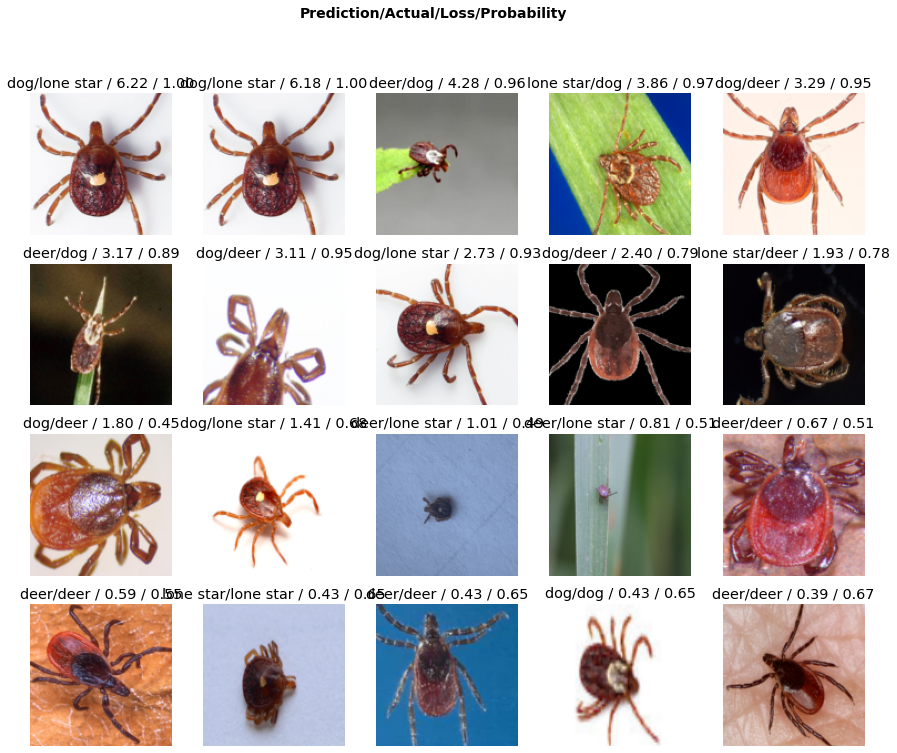

In [86]:
interp.plot_top_losses(20,nrows = 4)

In [53]:
learn2 = learn
learn2.export(fname = "learn.pkl")

In [54]:
path = Path()
path.ls(file_exts = '.pkl')

(#2) [Path('learn.pkl'),Path('export.pkl')]

In [87]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [88]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()


In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)